In [1]:
import denoising
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import skimage
from skimage.transform import rescale
from utils import mode
from utils import kmeans_vq
from utils import discretise
from skimage.measure import compare_mse

/home/redzin/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


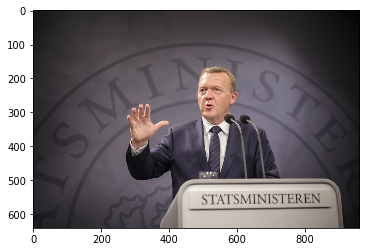

In [2]:
# Load the image
img = rescale(plt.imread('data/lars.jpg'),1.0)
img = skimage.img_as_float(img)
plt.imshow(img, cmap="gray")
plt.show()

In [13]:
# Settings
colour_bins = [6, 10, 24]
n_iter = 80
samples = 100
map_iter = n_iter * samples
t0 = 4
diffusion = 0.995
beta = 5
speckle_var = 0.02

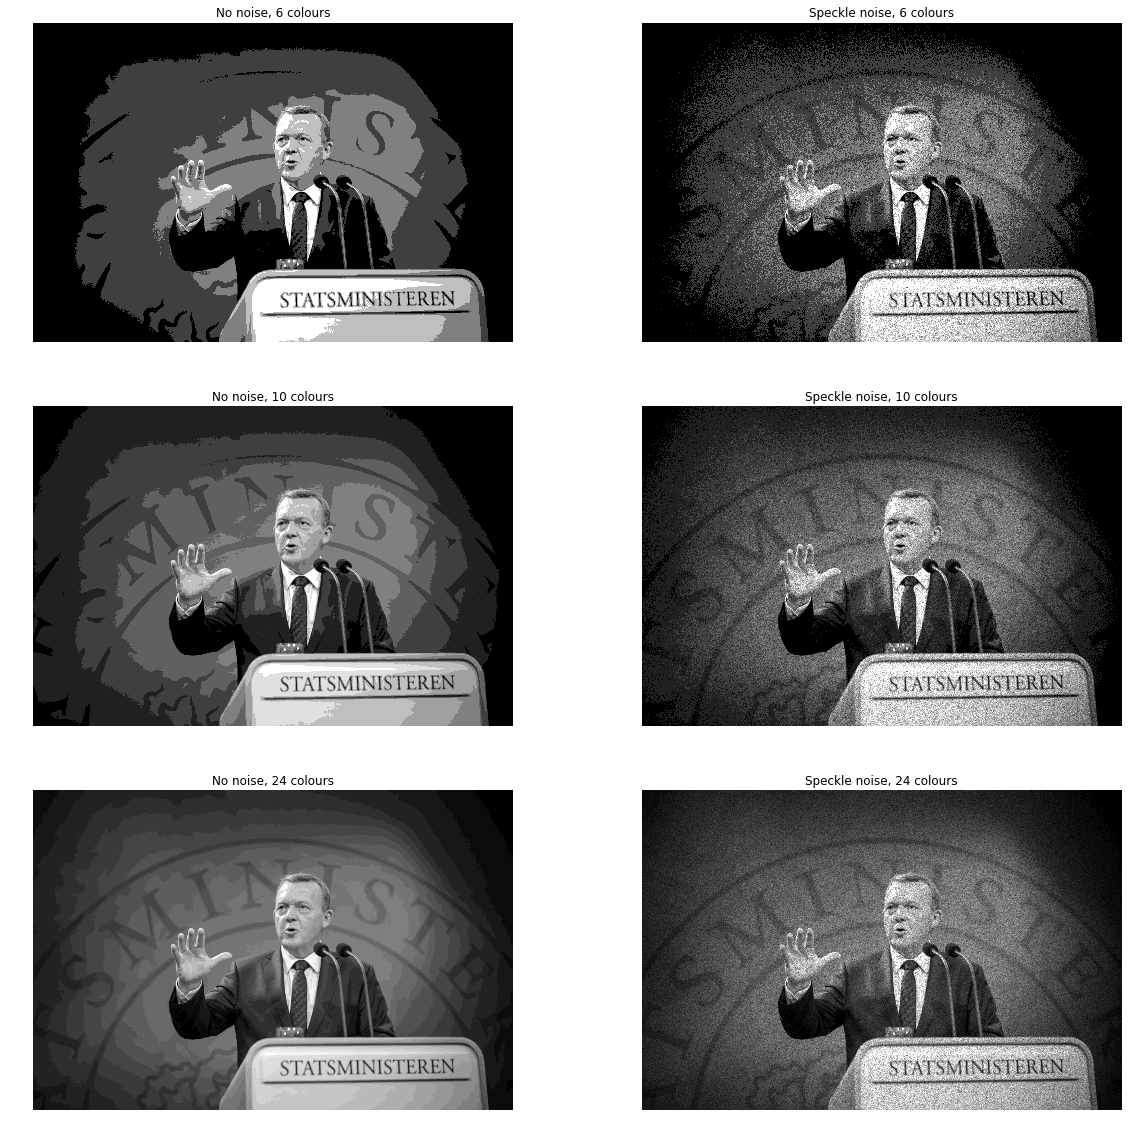

In [14]:
# Image pre-processing (degradation, etc.)
X = np.mean(img, 2)
Y = skimage.util.random_noise(X, 'speckle', mean=0, var=speckle_var)
X_disc = np.array([discretise(X, colour_bins[i]) for i in range(len(colour_bins))])
Y_disc = np.array([discretise(Y, colour_bins[i]) for i in range(len(colour_bins))])

fig, axarr = plt.subplots(len(colour_bins),2, figsize=(20,20))

for i in range(len(colour_bins)):
    
    axarr[i,0].imshow(X_disc[i], cmap='gray')
    axarr[i,0].grid(False)
    axarr[i,0].axis('off')
    axarr[i,0].set_title("No noise, " + str(colour_bins[i])+" colours")
    
    axarr[i,1].imshow(Y_disc[i], cmap='gray')
    axarr[i,1].grid(False)
    axarr[i,1].axis('off')
    axarr[i,1].set_title("Speckle noise, " + str(colour_bins[i])+" colours")

plt.savefig("results/colour_preprocessing", bbox_inches='tight')
plt.show()


In [11]:
pottsobj = [denoising.PottsMH(Y_disc[i], beta=beta, sigma=Y.std(), bins = colour_bins[i]) for i in range(len(colour_bins))]

In [12]:
%time X_samples = [[pottsobj[j].metropolisHastings2(n_iter, Y_disc[j]) for i in range(samples)] for j in range(len(colour_bins))]

KeyboardInterrupt: 

In [ ]:
#%time X_map = [pottsobj[i].MAP2(map_iter, Y_disc[i], tInit=t0, diffusion=diffusion) for i in range(len(colour_bins))]

In [ ]:
X_mean = np.array([np.mean(X_samples[i], 0) for i in range(len(colour_bins))])
X_mode = np.array([mode(X_samples[i], 0) for i in range(len(colour_bins))])

In [ ]:

fig, axarr = plt.subplots(len(colour_bins),2, figsize=(20,20))

for i in range(len(colour_bins)):
    
    axarr[i,0].imshow(Y_disc[i], cmap='gray')
    axarr[i,0].grid(False)
    axarr[i,0].axis('off')
    axarr[i,0].set_title("Discretised image, "+str(colour_bins[i])+" colours, MSE = %.4f" % compare_mse(X_disc[i], Y_disc[i]))
    
    axarr[i,1].imshow(X_mean[i], cmap='gray')
    axarr[i,1].grid(False)
    axarr[i,1].axis('off')
    axarr[i,1].set_title("Restored mean, MSE = %.4f" % compare_mse(X_disc[i], X_mean[i]))


#plt.savefig("results/colour_comparison", bbox_inches='tight')
plt.show()


In [ ]:

fig, axarr = plt.subplots(len(colour_bins),3, figsize=(16,12))

for i in range(len(colour_bins)):
    
    axarr[i,0].imshow(Y_disc[i], cmap='gray')
    axarr[i,0].grid(False)
    axarr[i,0].axis('off')
    axarr[i,0].set_title("Discretised image, "+str(colour_bins[i])+" colours, MSE = %.4f" % compare_mse(X_disc[i], Y_disc[i]))
    
    axarr[i,1].imshow(X_mean[i], cmap='gray')
    axarr[i,1].grid(False)
    axarr[i,1].axis('off')
    axarr[i,1].set_title("Restored mean, MSE = %.4f" % compare_mse(X_disc[i], X_mean[i]))

    axarr[i,2].imshow(X_disc[i], cmap='gray')
    axarr[i,2].grid(False)
    axarr[i,2].axis('off')
    axarr[i,2].set_title("Original, "+str(colour_bins[i])+" colours")

    

#plt.savefig("results/colour_comparison_all", bbox_inches='tight')
plt.show()
